# Bagmati catchment
# 1. MLP
## Hyperband tuner 

# Hyperparameter tuning using model_builder function from tensorflow   (Standard normalization)
(After midterm)
#(https://www.tensorflow.org/tutorials/keras/keras_tuner)

In [2]:
import numpy as np
import pandas as pd

### define file path
path = 'Non_scaled_6_input_Bagmati_yr.csv'  ####### This excel data is not scaled/normalized
## Read CSV file and convert it to dataframe
df = pd.read_csv( path, sep = ',', header = 'infer')


In [3]:
df

,Rt,Rt_1,Rt_2,Rt_3,Rt_4,Rt_5,Qt
0,0.878,25.060,3.613,8.190,1.608,28.160,299.0
1,0.000,0.878,25.060,3.613,8.190,1.608,182.0
2,25.527,0.000,0.878,25.060,3.613,8.190,151.0
3,36.896,25.527,0.000,0.878,25.060,3.613,561.0
4,6.184,36.896,25.527,0.000,0.878,25.060,384.0
...,...,...,...,...,...,...,...
2909,7.115,0.422,7.130,13.781,4.314,18.381,132.0
2910,3.118,7.115,0.422,7.130,13.781,4.314,107.0
2911,61.877,3.118,7.115,0.422,7.130,13.781,538.0
2912,112.900,61.877,3.118,7.115,0.422,7.130,921.0


In [4]:
df.describe()

,Rt,Rt_1,Rt_2,Rt_3,Rt_4,Rt_5,Qt
count,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000
mean,5.433136,5.434821,5.397316,5.378893,5.378374,5.385596,149.648264
std,14.030448,14.032511,13.890520,13.851130,13.851243,13.857633,271.208820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.800000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.700000
75%,4.916000,4.916000,4.864500,4.864500,4.864500,4.864500,195.975000
max,364.590000,364.590000,364.590000,364.590000,364.590000,364.590000,5030.000000


# 1. Data splitting

##  Train, Validation and Test data 
###  70% train (2040 data points)
###  15% train (436 data points)
###  15% train (436 data points)

In [5]:
df_train = df.iloc[:2040]

df_val = df.iloc[2040:2476] 

df_test = df.iloc[2476:2912] 

In [6]:
df_train

,Rt,Rt_1,Rt_2,Rt_3,Rt_4,Rt_5,Qt
0,0.878,25.060,3.613,8.190,1.608,28.160,299.0
1,0.000,0.878,25.060,3.613,8.190,1.608,182.0
2,25.527,0.000,0.878,25.060,3.613,8.190,151.0
3,36.896,25.527,0.000,0.878,25.060,3.613,561.0
4,6.184,36.896,25.527,0.000,0.878,25.060,384.0
...,...,...,...,...,...,...,...
2035,0.000,0.000,0.000,0.000,0.000,0.000,14.5
2036,0.000,0.000,0.000,0.000,0.000,0.000,14.5
2037,0.069,0.000,0.000,0.000,0.000,0.000,14.5
2038,0.579,0.069,0.000,0.000,0.000,0.000,14.0


# 2. Normalization

In [79]:
import pandas as pd
import numpy as np

### General function for all the normalization methods

def normalize_df(data, norm_method):     

    ## Normalize data using specified method
 
    if norm_method == 'minmax':
        # Min-Max normalization
        data_n = (data - data.min()) / (data.max() - data.min())
    elif norm_method == 'zscore':
        # Z-score normalization
        mean = data.mean()
        std = data.std()
        data_n = (data - mean) / std
    elif norm_method == 'max':
        # Max normalization
        data_n = 1 - ((data.max() - data)/data.max())
    else:
        raise ValueError("Invalid normalization method. Choose from: 'minmax', 'zscore', 'max'")
    return data_n



### Standard normalization  (Date sets for training, validation and testing are nromalized separately)

In [80]:
## Z_score(standard)
df_train_norm = normalize_df(df_train, 'zscore')
df_val_norm = normalize_df(df_val, 'zscore')
df_test_norm = normalize_df(df_test, 'zscore')

In [81]:
###example
df_train_norm.describe()

,Rt,Rt_1,Rt_2,Rt_3,Rt_4,Rt_5,Qt
count,2.040000e+03,2.040000e+03,2.040000e+03,2.040000e+03,2.040000e+03,2.040000e+03,2.040000e+03
mean,-2.590520e-17,5.329615e-16,-1.793772e-16,5.066753e-17,2.870797e-16,-2.443579e-17,2.166023e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.668091e-01,-3.674980e-01,-3.676080e-01,-3.678887e-01,-3.679488e-01,-3.686857e-01,-5.277226e-01
25%,-3.668091e-01,-3.674980e-01,-3.676080e-01,-3.678887e-01,-3.679488e-01,-3.686857e-01,-4.900124e-01
50%,-3.668091e-01,-3.674980e-01,-3.676080e-01,-3.678887e-01,-3.679488e-01,-3.686857e-01,-3.891311e-01
75%,-5.646773e-02,-5.666901e-02,-5.677197e-02,-5.549026e-02,-5.554508e-02,-5.307515e-02,1.998830e-01
max,2.456513e+01,2.455419e+01,2.455464e+01,2.455494e+01,2.455530e+01,2.454060e+01,1.705836e+01


In [82]:
### convert the dataframes to numpy arrays

df_train_f = df_train_norm.to_numpy()

df_val_f = df_val_norm.to_numpy()

df_test_f = df_test_norm.to_numpy()

In [83]:
### Define input and output sequences (list of sub sequences)

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
    # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1] 
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps_in, n_steps_out = 1, 1    #### 5 input sequences and 2 output sequences



### Split into input and target variables

In [84]:
#### Training data


X_train, y_train = split_sequences(df_train_f, n_steps_in, n_steps_out)
print(X_train.shape, y_train.shape)

# reshape from [samples, timesteps] into [samples, timesteps, features]

n_features = 6

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape)


(2040, 1, 6) (2040, 1)
(2040, 1, 6)


In [85]:
#### validation data

X_val, y_val = split_sequences(df_val_f , n_steps_in, n_steps_out)


X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))

### reshape

X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))

print(X_val.shape, y_val.shape)


(436, 1, 6) (436, 1)


In [86]:
#### Test data

X_test, y_test = split_sequences(df_test_f , n_steps_in, n_steps_out)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

print(X_test.shape, y_test.shape)


(436, 1, 6) (436, 1)


In [87]:
#### model fitting
import keras
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import save_model

from tensorflow.keras import initializers

from tensorflow.keras import layers


## Hyperparameter tuning using KerasTuner

In [9]:

import keras_tuner as kt


from keras_tuner.engine.hyperparameters import HyperParameters
from keras_tuner.engine.hyperparameters import Choice,Float

### a. Define model (Using model_builder function)
### (https://www.tensorflow.org/tutorials/keras/keras_tuner)
## MLP

In [7]:

def model_builder(hp):
    
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape = (n_steps_in, n_features)))   ### flattening is important when using this function
 ###1. Tune the number of units in the first Dense layer
     
    hp_units = hp.Int('units', min_value = 1, max_value = 10, step = 1)
    
###2. Tune the activation function

    hp_activation = hp.Choice("activation", ["relu", "tanh", "sigmoid"])
    
###3. Tune the weight initialization
    hp_initializer=hp.Choice('weight_init', ['he_uniform', 'glorot_uniform', 'random_normal' , 'lecun_normal'])  ##
    
       ### Fix the seeds for reproducibility purposes   
        
    if hp_initializer == 'he_uniform':
        init = tf.keras.initializers.he_uniform(seed=1)
    elif hp_initializer == 'glorot_uniform':
        init = tf.keras.initializers.glorot_uniform(seed=1)
    elif hp_initializer == 'random_normal':
        init = tf.keras.initializers.RandomNormal(seed=1)
    else:
        init = tf.keras.initializers.lecun_normal(seed=1)
    
###4. Tune the number of layers

    for i in range(hp.Int("num_layers", 1, 3)):
        
        model.add(keras.layers.Dense(units = hp_units, activation = hp_activation, kernel_initializer = init))
        model.add(Dropout(hp.Float('dropout_rate', 0, 0.3, step=0.1)))
    ### Output layer
   
    model.add(keras.layers.Dense(1, kernel_initializer = init))
    model.add(Dropout(hp.Float('dropout_rate', 0, 0.3, step=0.1)))
###4. Tune the optimizer 

    hp_optimizer = hp.Choice("optimizer", ['Adam', 'SGD', 'RMSprop'])

    model.compile (
                    optimizer = hp_optimizer, ##(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))###
                  
                    loss='mean_squared_error',
                   
                    metrics=[tf.keras.metrics.MeanSquaredError()])
    
  
    return model

    
 

### b.  Instantiate the tuner and perform hypertuning

In [8]:
#### Hyperband tuner ( it is a class)

tuner = kt.Hyperband(model_builder,
                     
                     objective= 'mean_squared_error',  ### should be the same as the loss funtion used when compiling
                     
                     max_epochs = 50,
                     
                     factor = 2,  
                     
                     seed = 10,
                     
                     directory='Exhaustive_Opt_norm',
                     
                     project_name='Test1_stand_data_n')

NameError: name 'kt' is not defined

In [96]:
### Create a callback to stop training early after reaching a certain value for the validation loss.

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [97]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [98]:
from keras.callbacks import TensorBoard

import datetime, os
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### C. Run hyperparameter search 

# 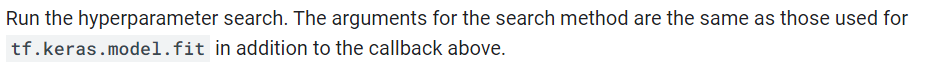

In [99]:
tuner.search(X_train, y_train, 
             epochs=200, 
             validation_data=(X_val, y_val), 
             callbacks=[stop_early,tb])

Trial 186 Complete [00h 00m 28s]
mean_squared_error: 0.5598854422569275

Best mean_squared_error So Far: 0.20135003328323364
Total elapsed time: 00h 22m 00s
INFO:tensorflow:Oracle triggered exit


In [100]:
tuner.results_summary()

Results summary
Results in Exhaustive_Opt_norm\Test1_stand_data_n
Showing 10 best trials
Trial summary
Hyperparameters:
units: 4
activation: relu
weight_init: he_uniform
num_layers: 2
dropout_rate: 0.0
optimizer: RMSprop
tuner/epochs: 50
tuner/initial_epoch: 25
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0118
Score: 0.20135003328323364
Trial summary
Hyperparameters:
units: 2
activation: relu
weight_init: he_uniform
num_layers: 2
dropout_rate: 0.0
optimizer: RMSprop
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.20144495368003845
Trial summary
Hyperparameters:
units: 8
activation: relu
weight_init: lecun_normal
num_layers: 2
dropout_rate: 0.0
optimizer: RMSprop
tuner/epochs: 50
tuner/initial_epoch: 25
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0073
Score: 0.2065293788909912
Trial summary
Hyperparameters:
units: 8
activation: relu
weight_init: lecun_normal
num_layers: 2
dropout_rate: 0.0
optimizer: RMSprop
tuner/epochs: 25
tuner/initial_epoch: 1

In [101]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 34156), started 21:24:34 ago. (Use '!kill 34156' to kill it.)

### steps in tensorboard

In [102]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [104]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [105]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 34156), started 21:25:02 ago. (Use '!kill 34156' to kill it.)

In [106]:
%tensorboard --logdir /Exhaustive_Opt_norm/

Reusing TensorBoard on port 6006 (pid 25076), started 2 days, 19:04:27 ago. (Use '!kill 25076' to kill it.)

In [107]:
%tensorboard --logdir AMT_Exhaustive_optimization/Test1--port=7007

Reusing TensorBoard on port 6006 (pid 21356), started 2 days, 19:25:02 ago. (Use '!kill 21356' to kill it.)

## d.  get the optimal hyperparameters

In [108]:

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The hyperparameter search is complete. The optimal number of units in the first densely-connected
# layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
# is {best_hps.get('learning_rate')}.
# """)

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}, the optimal activation function is {best_hps.get('activation')}, the optimal weight initialization is {best_hps.get('weight_init')} and the optimal optimizer is {best_hps.get('optimizer')}.
""")




The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 4, the optimal activation function is relu, the optimal weight initialization is he_uniform and the optimal optimizer is RMSprop.



## e. Train the model using the best model

In [109]:
model = tuner.hypermodel.build(best_hps)


In [110]:
### model training 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
mlp_amt_1 = model.fit(X_train, y_train, epochs=400, validation_data = (X_val, y_val), shuffle = 0, callbacks=[early_stopping])


Epoch 1/400
64/64 [==============================] - 2s 10ms/step - loss: 0.8302 - mean_squared_error: 0.8302 - val_loss: 0.8613 - val_mean_squared_error: 0.8613
Epoch 2/400
64/64 [==============================] - 0s 5ms/step - loss: 0.7530 - mean_squared_error: 0.7530 - val_loss: 0.7835 - val_mean_squared_error: 0.7835
Epoch 3/400
64/64 [==============================] - 1s 8ms/step - loss: 0.6870 - mean_squared_error: 0.6870 - val_loss: 0.7087 - val_mean_squared_error: 0.7087
Epoch 4/400
64/64 [==============================] - 0s 7ms/step - loss: 0.6201 - mean_squared_error: 0.6201 - val_loss: 0.6393 - val_mean_squared_error: 0.6393
Epoch 5/400
64/64 [==============================] - 0s 6ms/step - loss: 0.5570 - mean_squared_error: 0.5570 - val_loss: 0.5808 - val_mean_squared_error: 0.5808
Epoch 6/400
64/64 [==============================] - 0s 7ms/step - loss: 0.4992 - mean_squared_error: 0.4992 - val_loss: 0.5291 - val_mean_squared_error: 0.5291
Epoch 7/400
64/64 [==============

64/64 [==============================] - 0s 5ms/step - loss: 0.1738 - mean_squared_error: 0.1738 - val_loss: 0.3076 - val_mean_squared_error: 0.3076
Epoch 102/400
64/64 [==============================] - 0s 5ms/step - loss: 0.1736 - mean_squared_error: 0.1736 - val_loss: 0.3075 - val_mean_squared_error: 0.3075
Epoch 103/400
64/64 [==============================] - 0s 7ms/step - loss: 0.1732 - mean_squared_error: 0.1732 - val_loss: 0.3071 - val_mean_squared_error: 0.3071
Epoch 104/400
64/64 [==============================] - 0s 7ms/step - loss: 0.1737 - mean_squared_error: 0.1737 - val_loss: 0.3062 - val_mean_squared_error: 0.3062
Epoch 105/400
64/64 [==============================] - 0s 7ms/step - loss: 0.1734 - mean_squared_error: 0.1734 - val_loss: 0.3061 - val_mean_squared_error: 0.3061
Epoch 106/400
64/64 [==============================] - 0s 7ms/step - loss: 0.1731 - mean_squared_error: 0.1731 - val_loss: 0.3058 - val_mean_squared_error: 0.3058
Epoch 107/400
64/64 [===============

64/64 [==============================] - 0s 7ms/step - loss: 0.1727 - mean_squared_error: 0.1727 - val_loss: 0.2930 - val_mean_squared_error: 0.2930
Epoch 202/400
64/64 [==============================] - 0s 6ms/step - loss: 0.1733 - mean_squared_error: 0.1733 - val_loss: 0.2934 - val_mean_squared_error: 0.2934
Epoch 203/400
64/64 [==============================] - 0s 5ms/step - loss: 0.1731 - mean_squared_error: 0.1731 - val_loss: 0.2928 - val_mean_squared_error: 0.2928
Epoch 204/400
64/64 [==============================] - 0s 5ms/step - loss: 0.1727 - mean_squared_error: 0.1727 - val_loss: 0.2930 - val_mean_squared_error: 0.2930
Epoch 205/400
64/64 [==============================] - 0s 6ms/step - loss: 0.1732 - mean_squared_error: 0.1732 - val_loss: 0.2925 - val_mean_squared_error: 0.2925
Epoch 206/400
64/64 [==============================] - 0s 5ms/step - loss: 0.1730 - mean_squared_error: 0.1730 - val_loss: 0.2930 - val_mean_squared_error: 0.2930
Epoch 207/400
64/64 [===============

In [111]:
model.summary()   #### this shows us that the number of layers are 3 in this MLP model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dropout_4 (Dropout)         (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
 dropout_5 (Dropout)         (None, 1)                

## f. Test best model

In [112]:
eval_result = model.evaluate(X_test, y_test)
# eval_result = hypermodel.evaluate(X_test, y_test)

print("[test loss, test accuracy]:", eval_result)

14/14 [==============================] - 0s 3ms/step - loss: 0.2748 - mean_squared_error: 0.2748
[test loss, test accuracy]: [0.27482759952545166, 0.27482759952545166]


In [113]:
Y_pred = model.predict(X_test)   ### when using early stopping
# Y_pred = hypermodel.predict(X_test)   

14/14 [==============================] - 0s 3ms/step


In [114]:
Y_pred

array([[-5.36852956e-01],
       [-5.38507640e-01],
       [-5.37058532e-01],
       [-5.38097382e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.45792460e-01],
       [-6.04159951e-01],
       [-2.48556346e-01],
       [-1.86408356e-01],
       [-1.39964581e-01],
       [-1.32406145e-01],
       [-9.14548561e-02],
       [-4.99163121e-02],
       [-2.77664512e-03],
       [-2.33837068e-01],
       [-1.89326286e-01],
       [-1.26103729e-01],
       [ 1.30801737e-01],
       [ 2.94377625e-01],
       [ 2.37969112e+00],
       [ 2.58640480e+00],
       [ 9.52446163e-01],
       [ 1.04828370e+00],
       [ 1.29052806e+00],
       [ 9.65063632e-01],
       [-2.88150534e-02],
       [ 1.11969364e+00],
       [ 1.66463506e+00],
       [-7.17815757e-03],
       [-1.1

In [115]:
y_test

array([[-5.98808761e-01],
       [-6.00386034e-01],
       [-6.00386034e-01],
       [-5.98808761e-01],
       [-5.99860276e-01],
       [-5.97231489e-01],
       [-5.98808761e-01],
       [-6.00386034e-01],
       [-6.00386034e-01],
       [-6.01437548e-01],
       [-6.01963306e-01],
       [-6.03540578e-01],
       [-6.04592093e-01],
       [-6.05117850e-01],
       [-6.04592093e-01],
       [-5.86716341e-01],
       [-5.86716341e-01],
       [-5.60428470e-01],
       [-5.71995133e-01],
       [-5.78829979e-01],
       [-5.79355737e-01],
       [-5.74623920e-01],
       [-3.87454278e-01],
       [-4.44761837e-01],
       [-5.17316361e-01],
       [-4.87348188e-01],
       [-3.65372467e-01],
       [ 1.58807682e-01],
       [ 1.19901633e-01],
       [ 7.29254483e-01],
       [ 1.45663746e-01],
       [ 1.55653137e-01],
       [ 1.25159207e-01],
       [-3.43290655e-01],
       [-3.74836100e-01],
       [ 6.06753004e-01],
       [ 9.67683062e-02],
       [-4.00072456e-01],
       [-4.8

In [116]:
y_test.shape

(436, 1)

In [117]:
print(y_test[:,:-1].shape)   
print(y_test[:,1:2].shape)

(436, 0)
(436, 0)


In [118]:
y_test[:,-1:]    ##### all rows and all columns including -1(which is the last column)

array([[-5.98808761e-01],
       [-6.00386034e-01],
       [-6.00386034e-01],
       [-5.98808761e-01],
       [-5.99860276e-01],
       [-5.97231489e-01],
       [-5.98808761e-01],
       [-6.00386034e-01],
       [-6.00386034e-01],
       [-6.01437548e-01],
       [-6.01963306e-01],
       [-6.03540578e-01],
       [-6.04592093e-01],
       [-6.05117850e-01],
       [-6.04592093e-01],
       [-5.86716341e-01],
       [-5.86716341e-01],
       [-5.60428470e-01],
       [-5.71995133e-01],
       [-5.78829979e-01],
       [-5.79355737e-01],
       [-5.74623920e-01],
       [-3.87454278e-01],
       [-4.44761837e-01],
       [-5.17316361e-01],
       [-4.87348188e-01],
       [-3.65372467e-01],
       [ 1.58807682e-01],
       [ 1.19901633e-01],
       [ 7.29254483e-01],
       [ 1.45663746e-01],
       [ 1.55653137e-01],
       [ 1.25159207e-01],
       [-3.43290655e-01],
       [-3.74836100e-01],
       [ 6.06753004e-01],
       [ 9.67683062e-02],
       [-4.00072456e-01],
       [-4.8

## Evaluation metics

In [119]:
###nse

import hydroeval as he
nse = he.evaluator(he.nse, Y_pred, y_test[:,-1:]  )
print(nse)

[0.72454063]


In [120]:
##rmse
rmse = he.evaluator(he.rmse, Y_pred, y_test[:,-1:]  )
print(rmse)

[0.52424]


In [121]:
###logrmse
from sklearn.metrics import mean_squared_error
#### log of predicted values
y_pred_lg = np.log1p(Y_pred)

#### log of test values
y_test_lg = np.log1p(y_test[:,-1:])


In [122]:
##calculate mse
mse = mean_squared_error(y_pred_lg, y_test_lg)
rmse_lg = np.sqrt(mse)   
print(rmse_lg)

0.3980179311060734


## g. plot

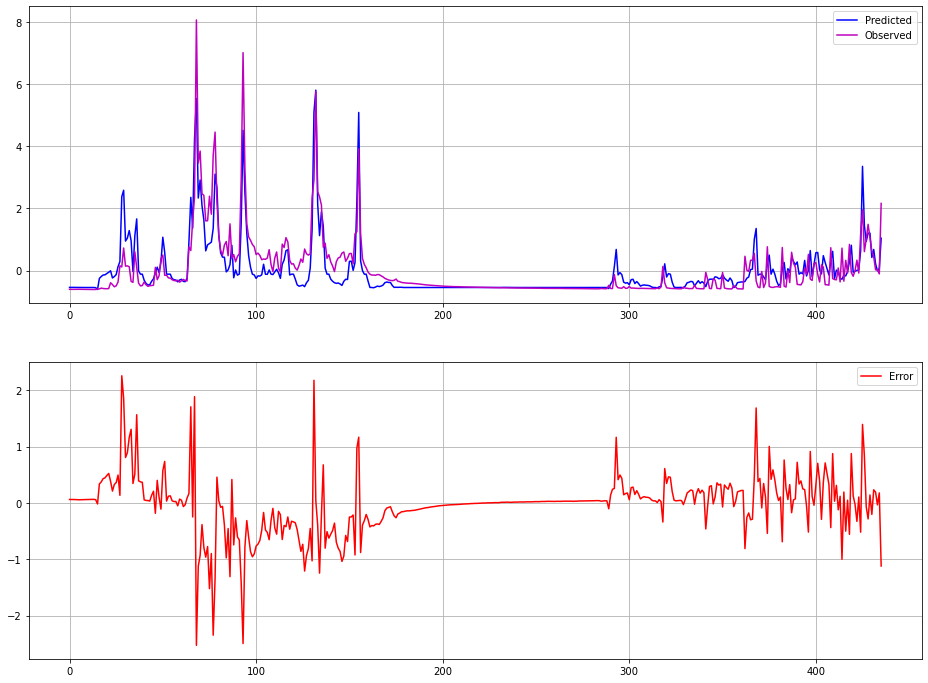

In [123]:
import matplotlib.pyplot as plt
# plt.plot(Q_pred)
# plt.plot(y_test)

plt.figure(figsize = (16, 12))

plt.subplot(2, 1, 1)

plt.plot(Y_pred[:,-1],'b', label = "Predicted")

plt.plot(y_test[:,-1], 'm',  label = "Observed")  

plt.legend()
plt.grid()

plt.subplot(2,1,2)

plt.plot(Y_pred[:,-1] - y_test[:,-1],'r', label = "Error")

plt.legend()

plt.grid()

##  save_model

## h. Denormalize the data

In [124]:
#### Original data
df_train_norm

# df_val_f

# df_test_f

,Rt,Rt_1,Rt_2,Rt_3,Rt_4,Rt_5,Qt
0,-0.306768,1.345488,-0.120634,0.191968,-0.258026,1.555244,0.500865
1,-0.366809,-0.307482,1.345417,-0.120909,0.191917,-0.258825,0.091390
2,1.378816,-0.367498,-0.307591,1.345176,-0.120965,0.190866,-0.017104
3,2.156268,1.377410,-0.367608,-0.307870,1.345145,-0.121841,1.417809
4,0.056074,2.154542,1.377339,-0.367889,-0.307929,1.343448,0.798347
...,...,...,...,...,...,...,...
2035,-0.366809,-0.367498,-0.367608,-0.367889,-0.367949,-0.368686,-0.494825
2036,-0.366809,-0.367498,-0.367608,-0.367889,-0.367949,-0.368686,-0.494825
2037,-0.362091,-0.367498,-0.367608,-0.367889,-0.367949,-0.368686,-0.494825
2038,-0.327215,-0.362781,-0.367608,-0.367889,-0.367949,-0.368686,-0.496575


In [125]:
### normalized data after model training
Y_pred    #### model out put
# y_obser = y_test[:,-1:]      ## observed discharge

array([[-5.36852956e-01],
       [-5.38507640e-01],
       [-5.37058532e-01],
       [-5.38097382e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.40750682e-01],
       [-5.45792460e-01],
       [-6.04159951e-01],
       [-2.48556346e-01],
       [-1.86408356e-01],
       [-1.39964581e-01],
       [-1.32406145e-01],
       [-9.14548561e-02],
       [-4.99163121e-02],
       [-2.77664512e-03],
       [-2.33837068e-01],
       [-1.89326286e-01],
       [-1.26103729e-01],
       [ 1.30801737e-01],
       [ 2.94377625e-01],
       [ 2.37969112e+00],
       [ 2.58640480e+00],
       [ 9.52446163e-01],
       [ 1.04828370e+00],
       [ 1.29052806e+00],
       [ 9.65063632e-01],
       [-2.88150534e-02],
       [ 1.11969364e+00],
       [ 1.66463506e+00],
       [-7.17815757e-03],
       [-1.1

In [126]:
def denormalize(data, original_data, type='min_max'):   ### default is min-max in this case(there is no reason behind this)

    if type == 'min_max':
        min = np.min(original_data)
        max = np.max(original_data)
        data = data * (max - min) + min
    elif type == 'z_score':
        mean = np.mean(original_data)
        std = np.std(original_data)
        data = data * std + mean
    elif type == 'max':                
        max = np.max(original_data)
        data = data * max
    else:
        raise ValueError("Invalid normalization type. Choose either 'max', 'min_max', or 'z_score'.")
    return data

In [127]:
Y_observ_unnorm = df_test['Qt']

In [128]:
Y_observ_unnorm = Y_observ_unnorm.to_numpy()

###  denormalized predicted discharge

In [129]:
### Standard denormalization (becasue we used standard(z-score) in this experiment)

Y_pred_denorm = denormalize(Y_pred, Y_observ_unnorm, type='z_score')

In [130]:
print(Y_pred_denorm)
print(Y_pred_denorm.shape)

[[  24.501274]
 [  24.186913]
 [  24.46222 ]
 [  24.264854]
 [  23.760773]
 [  23.760773]
 [  23.760773]
 [  23.760773]
 [  23.760773]
 [  23.760773]
 [  23.760773]
 [  23.760773]
 [  23.760773]
 [  23.760773]
 [  22.802917]
 [  11.714058]
 [  79.27289 ]
 [  91.07998 ]
 [  99.903534]
 [ 101.33951 ]
 [ 109.11958 ]
 [ 117.01122 ]
 [ 125.96698 ]
 [  82.069305]
 [  90.52562 ]
 [ 102.536865]
 [ 151.34468 ]
 [ 182.4214  ]
 [ 578.5966  ]
 [ 617.86884 ]
 [ 307.4436  ]
 [ 325.65115 ]
 [ 371.67358 ]
 [ 309.8407  ]
 [ 121.02011 ]
 [ 339.21786 ]
 [ 442.74777 ]
 [ 125.13077 ]
 [ 105.24034 ]
 [ 105.24034 ]
 [  68.08484 ]
 [  48.95742 ]
 [  39.10199 ]
 [  40.87674 ]
 [  61.69912 ]
 [  77.06375 ]
 [ 112.09502 ]
 [ 148.01527 ]
 [ 114.47998 ]
 [ 178.45041 ]
 [ 330.98663 ]
 [ 238.68161 ]
 [ 105.24034 ]
 [ 105.31421 ]
 [ 105.24034 ]
 [  78.48866 ]
 [  71.172295]
 [  69.460396]
 [  58.484467]
 [  69.66868 ]
 [  73.91978 ]
 [  60.977524]
 [  59.56752 ]
 [  80.79941 ]
 [ 303.8749  ]
 [ 574.4883  ]
 [ 386.493

### denormalized Observed discharge

In [131]:
len(y_test)

436

In [132]:
Y_obser_denorm = denormalize(y_test, Y_observ_unnorm, type='z_score')

In [133]:
Y_obser_denorm 

array([[  12.73068793],
       [  12.43103217],
       [  12.43103217],
       [  12.73068793],
       [  12.53091742],
       [  13.0303437 ],
       [  12.73068793],
       [  12.43103217],
       [  12.43103217],
       [  12.23126166],
       [  12.1313764 ],
       [  11.83172063],
       [  11.63195012],
       [  11.53206487],
       [  11.63195012],
       [  15.0280488 ],
       [  15.0280488 ],
       [  20.02231157],
       [  17.82483595],
       [  16.52632763],
       [  16.42644238],
       [  17.32540967],
       [  52.88456055],
       [  41.99706773],
       [  28.2129025 ],
       [  33.90636205],
       [  57.07974127],
       [ 156.66534078],
       [ 149.27383189],
       [ 265.04084274],
       [ 154.16820939],
       [ 156.06602924],
       [ 150.27268444],
       [  61.27492199],
       [  55.28180668],
       [ 241.76757826],
       [ 144.87888065],
       [  50.48731442],
       [  33.90636205],
       [  35.50452613],
       [  57.57916755],
       [  40.498

# Plot the denomalized data

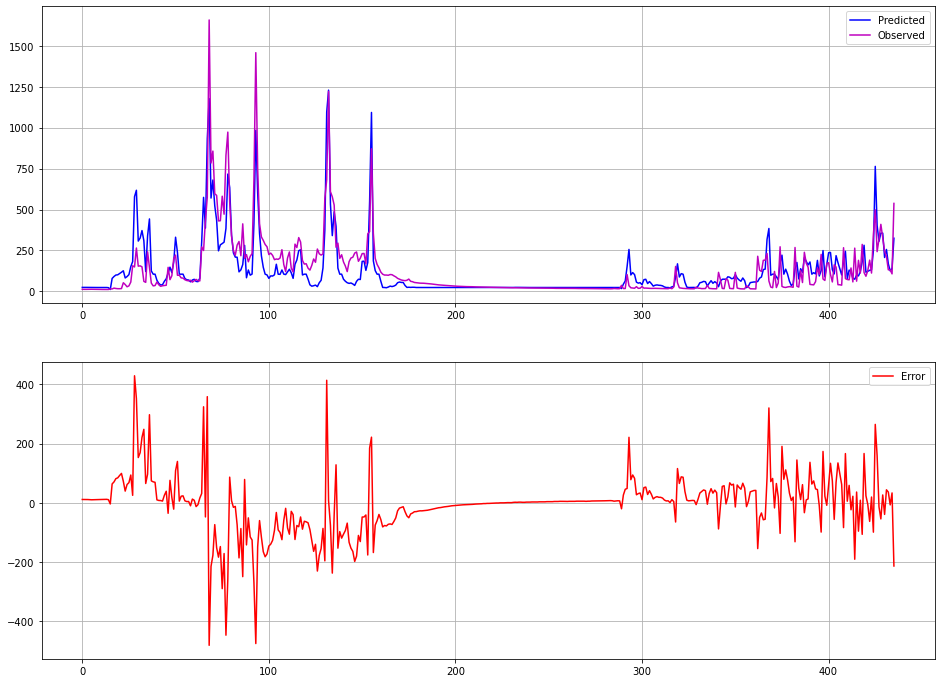

In [134]:
plt.figure(figsize = (16, 12))

plt.subplot(2, 1, 1)

plt.plot(Y_pred_denorm,'b', label = "Predicted")

plt.plot(Y_obser_denorm , 'm',  label = "Observed")  

plt.legend()
plt.grid()

plt.subplot(2,1,2)

plt.plot(Y_pred_denorm - Y_obser_denorm ,'r', label = "Error")

plt.legend()

plt.grid()

### NSE after denormalization

In [135]:
nse_d = he.evaluator(he.nse, Y_pred_denorm , Y_obser_denorm  )
print(nse_d)

[0.72454064]


### RMSE after denormalization (in m3/sec)

In [136]:
#### rmse in m3/sec
rmse_d = he.evaluator(he.rmse, Y_pred_denorm, Y_obser_denorm)
print(rmse_d)    ### 

[99.59696976]
